### Student details

Student name: Ashik Kannampilly Janardhanan

Student ID: 25032615

General rules:

1. Do not change anything in the given code unless you are requested to.

2. Install any external libraries that you might want to use within the notebook file with the !pip install command, so that your code can run without errors during autotests. This rule doesn't apply for numpy, pandas, matplotlib, and sklearn.

3. For any code you add, don't use again any of the predefined names for variables, functions, or classes that are already included in the template (i.e. no duplicate names).

# Task 1 - Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [4]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [5]:
class CustomPerceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### 1. Read the data
(provided - should be completed in previous E-tivity)

In [6]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

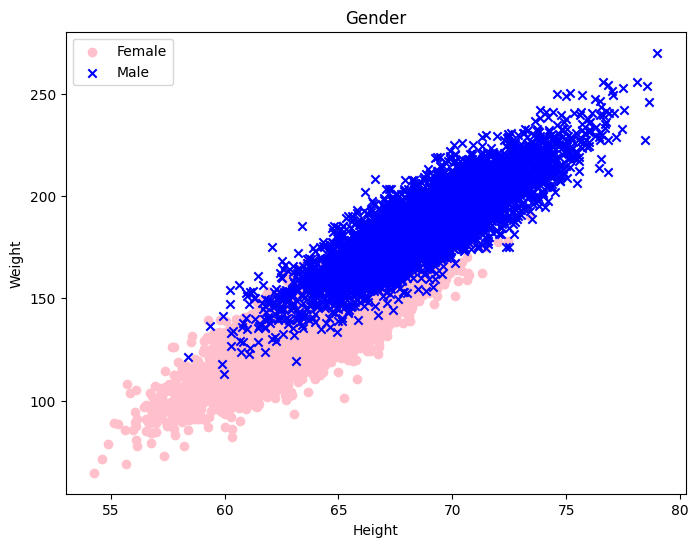

In [7]:
# Plot the data as a scatter plot
import matplotlib.pyplot as plt
# Your code here
plt.figure(figsize=(8,6))
plt.scatter(X[y==1, 0], X[y==1, 1], color='pink', marker='o', label='Female')
plt.scatter(X[y==-1, 0], X[y==-1, 1], color='blue', marker='x', label='Male')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Gender')
plt.legend()
plt.show()

### Train/Test Split
(provided - should be completed in previous E-tivity)

In [8]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # !!!DO NOT CHANGE THE NAMES OF THE SPLITS!!!

### 2. Train the algorithm (Task)

In [9]:
# Your code here
perceptron = CustomPerceptron(epochs=50, eta=0.1)# !!!DO NOT CHANGE THE NAME OF THE MODEL!!!
perceptron.train(X_train, y_train)


### 3. Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [10]:
################################
# Your code here
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy*100:.2f}%")

Accuracy on test data: 85.45%


### Visualisations (Task)
4. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
5. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

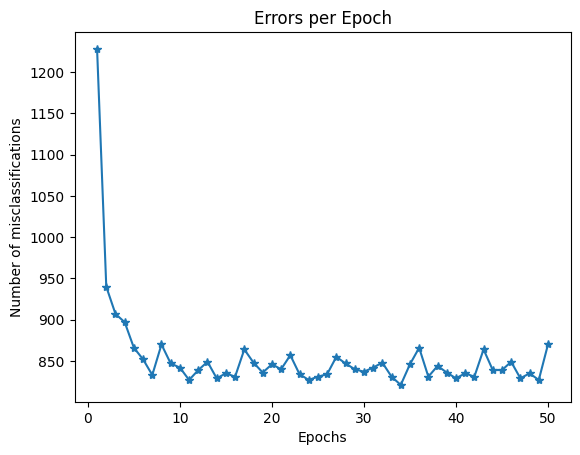

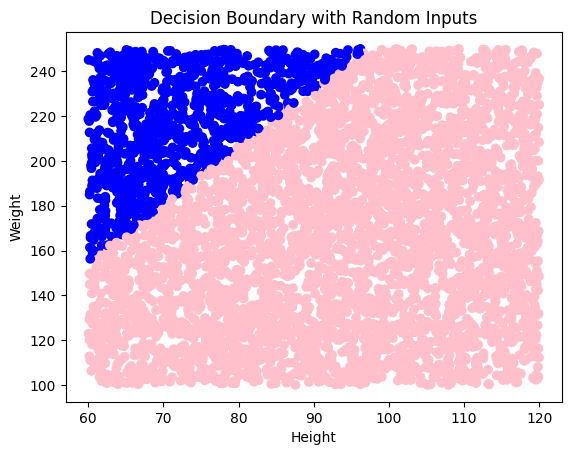

In [11]:
################################
# Your code here
plt.plot(range(1, len(perceptron.errors_)+1), perceptron.errors_, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Errors per Epoch')
plt.show()

random_samples = np.random.uniform(low=[60,100], high=[120,250], size=(5000,2))
predictions = perceptron.predict(random_samples)
colors = ['pink' if p==1 else 'blue' for p in predictions]
h = random_samples[:,0]
w = random_samples[:,1]
plt.scatter(h, w, c=colors)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary with Random Inputs')
plt.show()


In [12]:
class CustomPerceptronEE(CustomPerceptron):
    def __init__(self, eta=0.01, epochs=50, min_error=0):
        super().__init__(eta=eta, epochs=epochs)
        self.min_error = min_error

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for epoch in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors <= self.min_error:
                print(f"Early stopping at epoch {epoch+1} with {errors} errors")
                break
        return self


Accuracy on test data (Early Exit): 85.45%


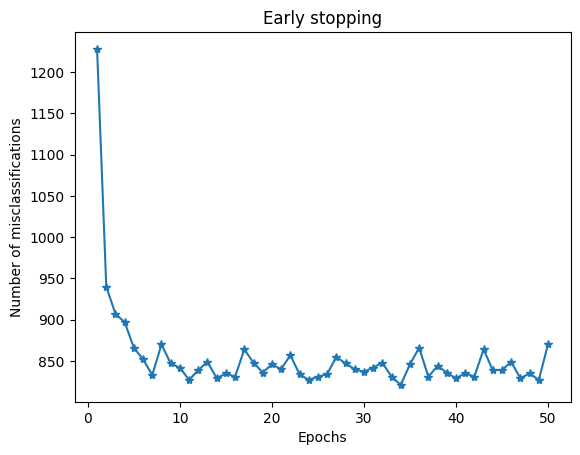

In [13]:
perceptron_ee = CustomPerceptronEE(eta=0.1, epochs=50, min_error=0)
perceptron_ee.train(X_train, y_train)
y_pred_ee = perceptron_ee.predict(X_test)
accuracy_ee = accuracy_score(y_test, y_pred_ee)
print(f"Accuracy on test data (Early Exit): {accuracy_ee*100:.2f}%")
plt.plot(range(1, len(perceptron_ee.errors_)+1), perceptron_ee.errors_, marker='*')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Early stopping')
plt.show()


### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses?
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1.Describe what is happening as the training progresses

During training, the perceptron compares the predicted label with the actual label. If the prediction is wrong, the model updates the weights to reduce the error. Over successive epochs, the weights adjust to improve accuracy.

2.Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?

The last epoch may not have the lowest error. Sometimes an earlier epoch has fewer errors because weight updates for each sample can temporarily increase misclassifications or erros.

3.Why can’t we get zero error with this data?

Zero error isn’t possible because the perceptron works best on linearly separable data, but some samples in this dataset overlap.

# Task 2 - Adaline

* Iris Data Data obtained from https://archive.ics.uci.edu/ml/datasets/iris


In [14]:
# import dependencies
import numpy as np

### Adaline class (provided)
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [15]:
class AdalineGD(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

### Read the data
(provided - should be completed in previous E-tivity)

<span style="color: red">We will use the Iris-setosa and Iris-versicolor classes. Use the whole dataset for training. Don't create a test set.</span>

In [16]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y_iris = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X_iris = df.iloc[0:100, [0,2]].values

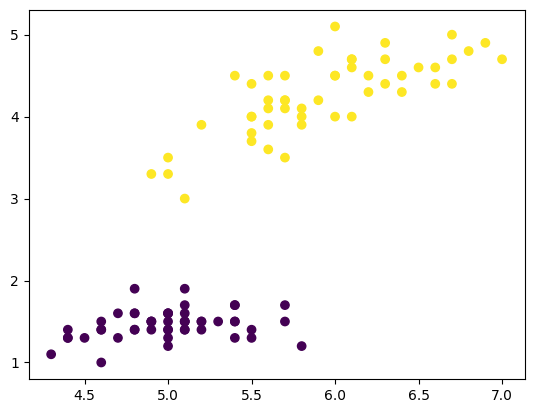

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_iris[:,0], X_iris[:,1],c=y_iris);

### Examine the impact of learning rate

1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001. Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
2. Explain what is happening in each case?
3. How many epochs (approx) for convergence with eta = 0.0001?
4. Can you find a learning rate that converges quicker, but without overshoot?
5. The learning rate can be very sensitive, a very small change can lead to overshoot. For example, have a look at what happens between a learnign rate of 0.00045 and 0.0005, just a 5e-5 change

Please note that this is just about the simplest gradient descent implementation posssible. There are much more advanced algorithms that are typically used that improve robustness, avoid local minima, avoid overshoot and improve convergence times. So it's not all as "on a knife edge" as this example. But, in principle, picking a learning rate is still an important topic of machine learning.

1.What’s happening

η = 0.01 : diverging —  rises linearly, overshoot .
η = 0.001 : slower divergence than 0.01 but not converging in the range.
η = 0.0001 : stable and almost converged .

2.How many epochs (approx) for convergence with eta = 0.0001?

40-50 epochs

3.Can you find a learning rate that converges quicker, but without overshoot?

one example, eta =0.003

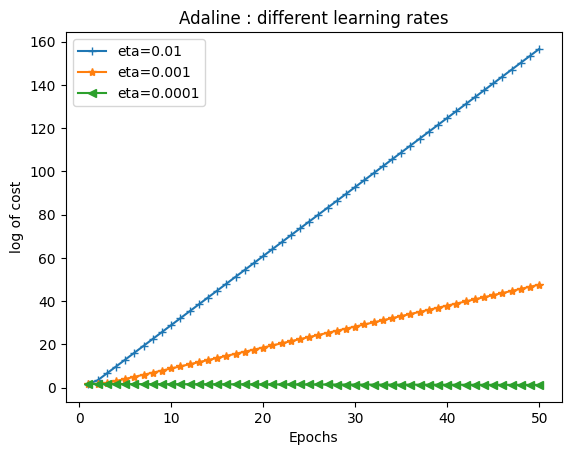

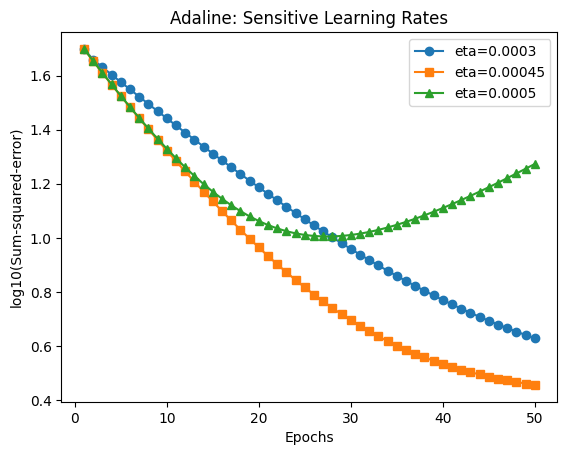

In [18]:
# 1. Train the gradient descent algorithm with eta = 0.01, eta = 0.001, eta = 0.0001.
# Plot the cost as a function of epoch in each case. Note: it is useful to plot some on a log scale
################################
# Your code here

# !!!DO NOT CHANGE THE NAMES OF THE MODELS!!!
adaline_01 = AdalineGD(eta=0.01, epochs=50)
adaline_01.train(X_iris, y_iris)
adaline_001 = AdalineGD(eta=0.001, epochs=50)
adaline_001.train(X_iris, y_iris)
adaline_0001 = AdalineGD(eta=0.0001, epochs=50)
adaline_0001.train(X_iris, y_iris)

plt.plot(range(1, len(adaline_01.cost_)+1), np.log10(adaline_01.cost_), marker='+', label='eta=0.01')
plt.plot(range(1, len(adaline_001.cost_)+1), np.log10(adaline_001.cost_), marker='*', label='eta=0.001')
plt.plot(range(1, len(adaline_0001.cost_)+1), np.log10(adaline_0001.cost_), marker='<', label='eta=0.0001')
plt.xlabel('Epochs')
plt.ylabel('log of cost')
plt.title('Adaline : different learning rates')
plt.legend()
plt.show()
adaline_0003 = AdalineGD(eta=0.0003, epochs=50).train(X_iris, y_iris)
adaline_00045 = AdalineGD(eta=0.00045, epochs=50).train(X_iris, y_iris)
adaline_0005 = AdalineGD(eta=0.0005, epochs=50).train(X_iris, y_iris)

# Plot sensitive learning rates
plt.plot(range(1, len(adaline_0003.cost_)+1), np.log10(adaline_0003.cost_), marker='o', label='eta=0.0003')
plt.plot(range(1, len(adaline_00045.cost_)+1), np.log10(adaline_00045.cost_), marker='s', label='eta=0.00045')
plt.plot(range(1, len(adaline_0005.cost_)+1), np.log10(adaline_0005.cost_), marker='^', label='eta=0.0005')
plt.xlabel('Epochs')
plt.ylabel('log10(Sum-squared-error)')
plt.title('Adaline: Sensitive Learning Rates')
plt.legend()
plt.show()

1.What is happening for different learning rates?
Larger learning rates converge faster but risk overshooting. Smaller learning rates are safer but much slower.
2.

### Feature Scaling

A problem with features is that they can be on a different scale, and gradient descent can struggle with this. Feature scaling can reduce the sensitivity to learning rate, and can lead to faster convergence. One of the more common approaches to feature scaling is standardisation, given by:

\begin{equation}
\textbf{x}_{j,std} = \frac{\textbf{x}_j - \mu_j}{\sigma_j}
\end{equation}

where $\mu_j$ is the mean and $\sigma_j$ is the standard deviation of $\textbf{x}_j$. Note that we don't have a good definition for the subtraction of a vector and a scalar, but here by $\textbf{x}_j - \mu_j$ we mean the subtraction of $\mu_j$ from each element of $\textbf{x}_j$.


Ref: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

1. Implement feature scaling on the data, and retrain the algorithm
2. Print the residual cost in each iteration
3. Describe how it compares to before feature scaling
4. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

Hint: in this case, the training data was scaled, so your test data has to be scaled as well.

Epoch  1 : Cost = 50.0000
Epoch  2 : Cost = 33.8269
Epoch  3 : Cost = 23.1530
Epoch  4 : Cost = 16.1086
Epoch  5 : Cost = 11.4594
Epoch  6 : Cost = 8.3910
Epoch  7 : Cost = 6.3660
Epoch  8 : Cost = 5.0295
Epoch  9 : Cost = 4.1474
Epoch  10 : Cost = 3.5653
Epoch  11 : Cost = 3.1811
Epoch  12 : Cost = 2.9275
Epoch  13 : Cost = 2.7602
Epoch  14 : Cost = 2.6498
Epoch  15 : Cost = 2.5769
Epoch  16 : Cost = 2.5288
Epoch  17 : Cost = 2.4970
Epoch  18 : Cost = 2.4761
Epoch  19 : Cost = 2.4622
Epoch  20 : Cost = 2.4531
Epoch  21 : Cost = 2.4471
Epoch  22 : Cost = 2.4431
Epoch  23 : Cost = 2.4405
Epoch  24 : Cost = 2.4388
Epoch  25 : Cost = 2.4376
Epoch  26 : Cost = 2.4369
Epoch  27 : Cost = 2.4364
Epoch  28 : Cost = 2.4360
Epoch  29 : Cost = 2.4358
Epoch  30 : Cost = 2.4357
Epoch  31 : Cost = 2.4356
Epoch  32 : Cost = 2.4355
Epoch  33 : Cost = 2.4355
Epoch  34 : Cost = 2.4355
Epoch  35 : Cost = 2.4354
Epoch  36 : Cost = 2.4354
Epoch  37 : Cost = 2.4354
Epoch  38 : Cost = 2.4354
Epoch  39 : Cost

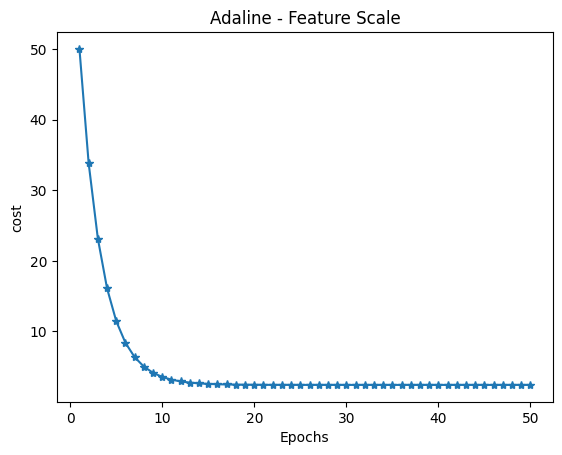

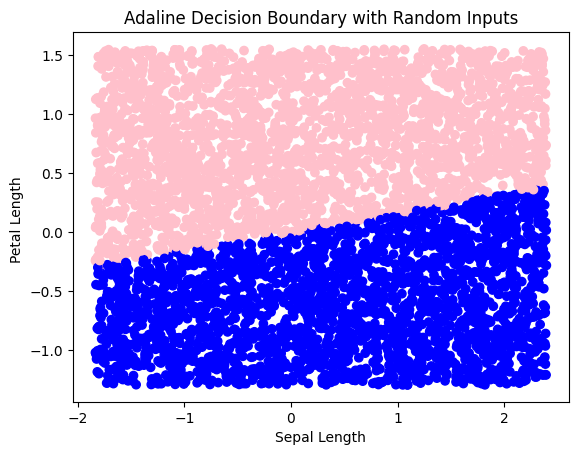

In [19]:
################################
# Your code here

X_scaled = np.copy(X_iris)
X_scaled[:,0] = (X_iris[:,0] - X_iris[:,0].mean()) / X_iris[:,0].std()
X_scaled[:,1] = (X_iris[:,1] - X_iris[:,1].mean()) / X_iris[:,1].std()
adaline_scaled = AdalineGD(eta=0.01, epochs=50)
adaline_scaled.train(X_scaled, y_iris)
for i, cost in enumerate(adaline_scaled.cost_):
    print("Epoch ",i+1,f": Cost = {cost:.4f}")
plt.plot(range(1, len(adaline_scaled.cost_)+1), adaline_scaled.cost_, marker='*')
plt.xlabel('Epochs')
plt.ylabel('cost')
plt.title('Adaline - Feature Scale')
plt.show()  # !!!DO NOT CHANGE THE NAME OF THE SCALED FEATURES!!!
low=[X_iris[:,0].min(), X_iris[:,1].min()]
high=[X_iris[:,0].max(), X_iris[:,1].max()]
random_samples = np.random.uniform(low,high,(5000,2))
random_samples[:,0] = (random_samples[:,0] - X_iris[:,0].mean()) / X_iris[:,0].std()
random_samples[:,1] = (random_samples[:,1] - X_iris[:,1].mean()) / X_iris[:,1].std()

predictions = adaline_scaled.predict(random_samples)

colors = ['pink' if p==1 else 'blue' for p in predictions]
plt.scatter(random_samples[:,0], random_samples[:,1], c=colors)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length ')
plt.title('Adaline Decision Boundary with Random Inputs')
plt.show()

Before scaling:

Gradient descent struggled because the features had different ranges.

After scaling:

Features are Scaled, so gradient descent converges faster.

The algorithm is more stable.

# Task 3: scikit learn

In [20]:
# import dependencies
import numpy as np

1.	Read the iris dataset using Pandas (ref Option 2 above)
2.	Extract the Iris-setosa and Iris-verginica samples only
3.	Extract the petal length and petal width. These shall be our features.

In [21]:
# 1. Read the iris dataset using Pandas
import pandas as pd
df = pd.read_csv('iris_data.csv')

################################
# Your code here
df = df[(df[' class'] == 'Iris-setosa') | (df[' class'] == 'Iris-virginica')]
X = df.iloc[:,2:4].values
y = np.where(df[' class'] == 'Iris-setosa', 1, -1)

4.	Plot the dataset as a scatter plot with the two Iris types shown as different colours

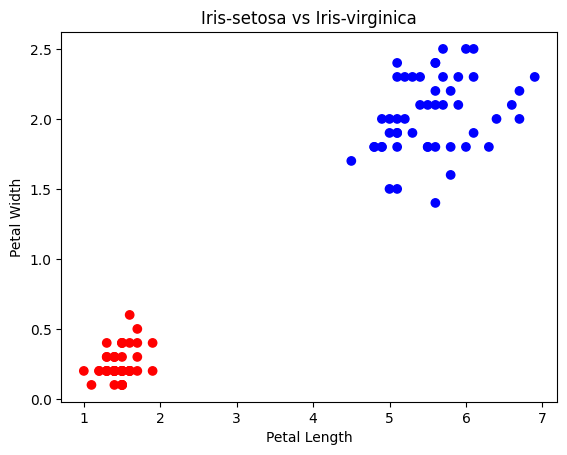

In [22]:
################################
# Your code here
colors = ['red' if label == 1 else 'blue' for label in y]

plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris-setosa vs Iris-virginica')
plt.show()


5.	Use the perceptron in sklearn.linear_model to train on the Iris data previously used. Set verbose = 1; have a look at the epochs, it converges very quickly?

Yes it did converged in 7 epochs

In [23]:
# So as not to confuse with our previously defined Perceptron class
from sklearn.linear_model import Perceptron

perceptron_skl =  Perceptron(verbose=1)  # !!!DO NOT CHANGE THE NAME OF THE MODEL!!!
perceptron_skl.fit(X, y)

-- Epoch 1
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 100, Avg. loss: 0.164200
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 200, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 300, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 500, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 600, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.52, NNZs: 2, Bias: 2.000000, T: 700, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds


Perceptron(verbose=1)

6.	Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary for the feature scaled case

Text(0.5, 1.0, 'Perceptron Decision Boundary with Random Inputs')

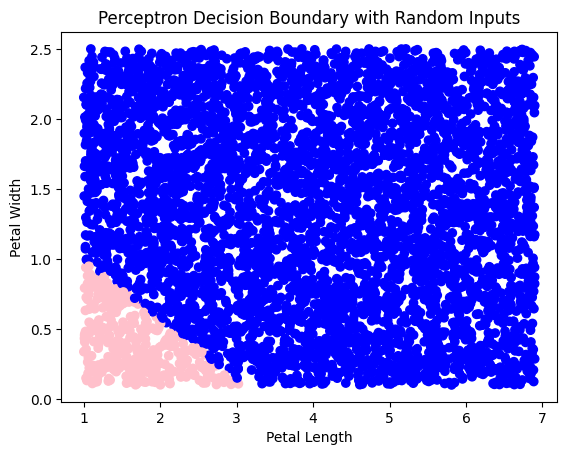

In [24]:
import random

################################
# Your code here
low=[X[:,0].min(), X[:,1].min()]
high=[X[:,0].max(), X[:,1].max()]
random_samples = np.random.uniform(low,high,(5000,2))

predictions = perceptron_skl.predict(random_samples)

colors = ['pink' if p==1 else 'blue' for p in predictions]
plt.scatter(random_samples[:,0], random_samples[:,1], c=colors)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Perceptron Decision Boundary with Random Inputs')
